In [1]:
import pylab as pl
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
from math import sin, cos
from scipy import optimize

def f(x): #❶
    x0, x1, x2 = x.tolist() #❷
    return [
        5*x1+3,
        4*x0*x0 - 2*sin(x1*x2),
        x1*x2 - 1.5
    ]

result = optimize.fsolve(f, [1,1,1]) #❸
print (result)
print (f(result))

[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [4]:
def j(x):  #❶
    x0, x1, x2 = x.tolist()
    return [[0, 5, 0],
            [8 * x0, -2 * x2 * cos(x1 * x2), -2 * x1 * cos(x1 * x2)],
            [0, x2, x1]]


result = optimize.fsolve(f, [1, 1, 1], fprime=j)  #❷
print(result)
print(f(result))

[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [5]:
import numpy as np
from scipy import optimize

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p): #❶
   
    k, b = p
    return Y - (k*X + b)

r = optimize.leastsq(residuals, [1, 0]) #❷
k, b = r[0]
print ("k =",k, "b =",b)

k = 0.6134953491930442 b = 1.794092543259387


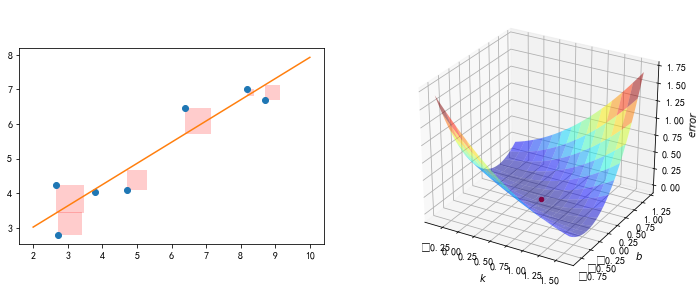

In [6]:

scale_k = 1.0
scale_b = 10.0
scale_error = 1000.0

def S(k, b):
    
    error = np.zeros(k.shape)
    for x, y in zip(X, Y):
        error += (y - (k * x + b)) ** 2
    return error

ks, bs = np.mgrid[k - scale_k:k + scale_k:40j, b - scale_b:b + scale_b:40j]
error = S(ks, bs) / scale_error

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle

fig = pl.figure(figsize=(12, 5))

ax1 = pl.subplot(121)

ax1.plot(X, Y, "o")
X0 = np.linspace(2, 10, 3)
Y0 = k*X0 + b
ax1.plot(X0, Y0)

for x, y in zip(X, Y):
    y2 = k*x+b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)
    ax1.add_patch(rect)

ax1.set_aspect("equal")


ax2 = fig.add_subplot(122, projection='3d')

ax2.plot_surface(
    ks, bs / scale_b, error, rstride=3, cstride=3, cmap="jet", alpha=0.5)
ax2.scatter([k], [b / scale_b], [S(k, b) / scale_error], c="r", s=20)
ax2.set_xlabel("$k$")
ax2.set_ylabel("$b$")
ax2.set_zlabel("$error$");

In [1]:

def func(x, p):  #❶
    """
    A*sin(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)


def residuals(p, y, x):  #❷
    """    
    """
    return y - func(x, p)


x = np.linspace(0, 2 * np.pi, 100)
A, k, theta = 10, 0.34, np.pi / 6 
y0 = func(x, [A, k, theta]) 

np.random.seed(0)
y1 = y0 + 2 * np.random.randn(len(x))  #❸

p0 = [7, 0.40, 0]  

plsq = optimize.leastsq(residuals, p0, args=(y1, x))  #❹

print(u":", [A, k, theta])
print(u"合", plsq[0])  

pl.plot(x, y1, "o", label=u"")
pl.plot(x, y0, label=u"")
pl.plot(x, func(x, plsq[0]), label=u"")
pl.legend(loc="best")

NameError: name 'np' is not defined